# An IPython notebook to illustrate the use of VarPy

### Example of data exploration and visualization based on the Tjornes fracutre zone, Iceland

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Import VarPy libraries

In [2]:
import sys
from varpy.management import core
from varpy.data_preparation import window
from varpy.visualisation import rate_plots, mag_plots, iet_plots, map_plots, scatter_plots

### Specify data file locations and set-up VarPy object

In [3]:
ID = 'Tjornes_ex1'
ecvd_data_file = './Data/Iceland/Seismic/Cats/Iceland_IMO_C1_95-onwards.txt'
ecvd_metadata_file = './Data/Iceland/Seismic/Cats/Iceland_IMO_C1_meta.txt'

In [4]:
d1 = core.Volcanic(ID)

Add seismicity data as "earthquake catalogue volcanic data" (ECVD)

In [5]:
d1.add_datatype('ecvd', ecvd_data_file, ecvd_metadata_file)


### Filtering data: Select data by latitude and longitude for events located in Iceland

In [6]:
#Boundary coordinates for Iceland
lon_min = -25.5
lon_max = -12.0
lat_min = 62.7
lat_max = 67.5

d1 = window.latlon(d1, lat_min, lat_max, lon_min, lon_max)
d1 = window.single_attribute(d1, 'depth', -5, 50.0, 'ecvd')
d1 = window.single_attribute(d1, 'magnitude', -1.0, 10.0, 'ecvd')

### Show regional epicentre map of larger events

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


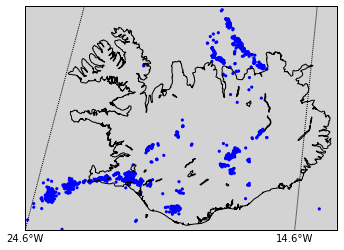

In [7]:
d2=window.single_attribute(d1, 'magnitude', 3.0, 10.0, 'ecvd')
map_plots.plot_map(d2)

### Filtering data: Select a sub-set of events occuring in the Tjornes fracture zone by latitude and longitude 

In [8]:
#Boundary coordinates for Tjornes fracture zone
lat_min_r1 = 65.5
lat_max_r1 = 67.5
lon_min_r1 = -20.0
lon_max_r1 = -16.0
d3 = window.latlon(d1, lat_min_r1, lat_max_r1, lon_min_r1, lon_max_r1)

### Quality check: Examine the earthquake magnitude-frequency distribution

Plot the magnitude time series showing completness magntiudes

varpy/statistics/mags.py:277: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 27 but corresponding boolean dimension is 22
  Mco_sel = Mco[logic_dbi]


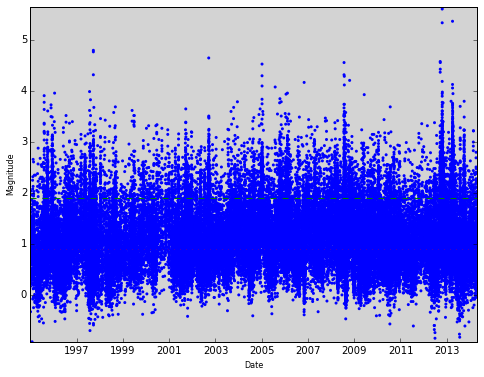

In [9]:
mag_plots.mag_mc_plot(d3)

Plot the magnitude-frequency distribution - discrete (blue) and cumulative (red)

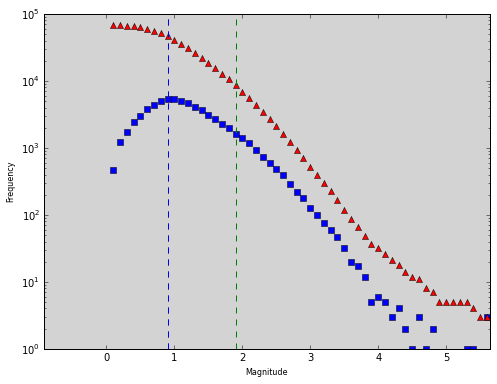

In [10]:
mag_plots.mf_plot(d3)

Plot the b-value stability as a function of cut-off magntiude

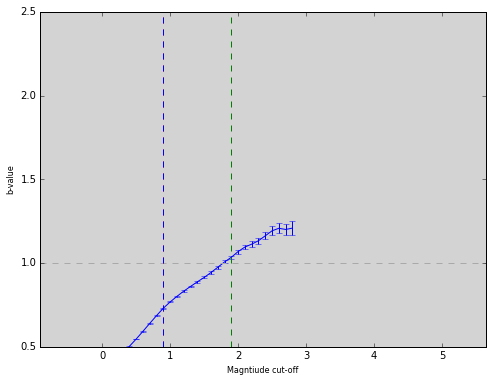

In [11]:
mag_plots.bstab_plot(d3)

### Filtering data: Select data with magnitudes above the chosen completeness threshold

In [12]:
d4=window.single_attribute(d3, 'magnitude', 2.0, 10.0, 'ecvd')

### Plot a map of this sub-region, coloured by time

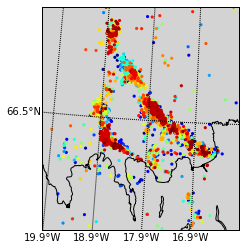

In [13]:
map_plots.plot_map(d4, colour='datetime')

### Plot the time series of daily rate and total number of events

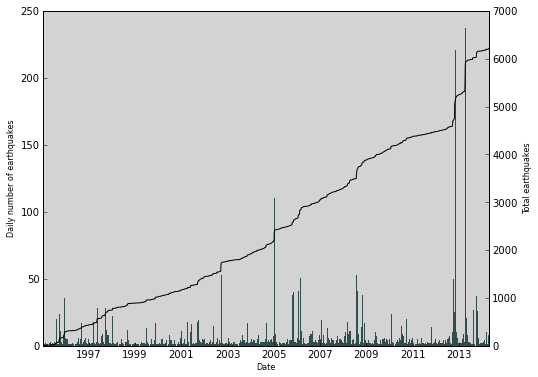

In [14]:
fig1 = rate_plots.ecd_rate_plot(d4)

### Data Exploration: Something interesting might be happening in the last two years! - select a sub-set of data to examine this time period

In [15]:
start = '01-01-2012'
finish = '01-01-2014'
d5=window.datetime(d3, start, finish)
d5=window.single_attribute(d5, 'magnitude', 1.0, 10.0, 'ecvd')

### Plot the time series of magnitudes, coloured by time

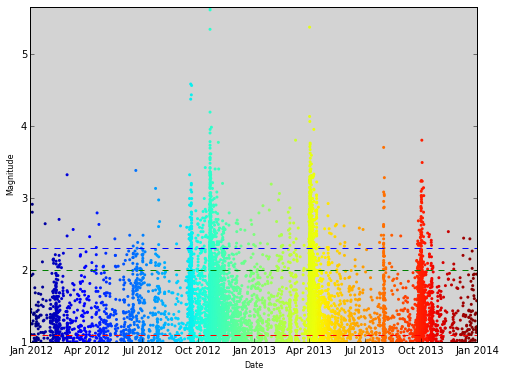

In [16]:
mag_plots.mag_mc_plot(d5, colour='datetime')

### Plot the timeseries of earthquake rates (daily and total)

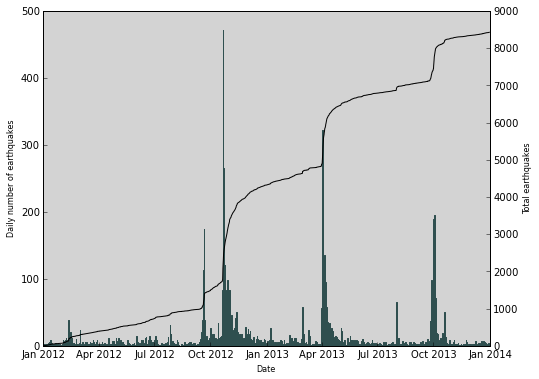

In [17]:
fig2 = rate_plots.ecd_rate_plot(d5)

### Examine earthquake clusters by looking at longitude and latitude as a function of time

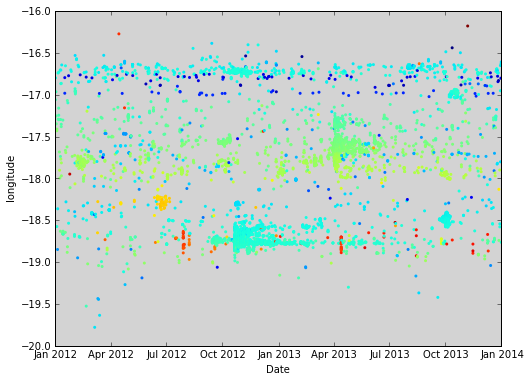

In [18]:
scatter_plots.scatter_plot(d5, 'longitude', colour='latitude', y_lims=[lon_min_r1,lon_max_r1])

In [ ]:
scatter_plots.scatter_plot(d5, 'latitude', colour='longitude', y_lims=[lat_min_r1,lat_max_r1])

### Movie: Space time window, colored by time.  Graph1: Plot time series of daily rate and total number of events. Graph2: Plot the time series of magnitudes, coloured by time

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('-FzNopDK7TQ')